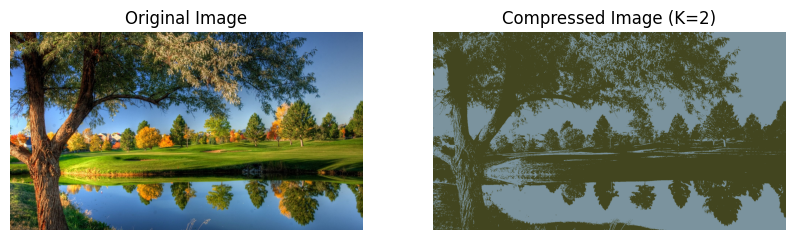

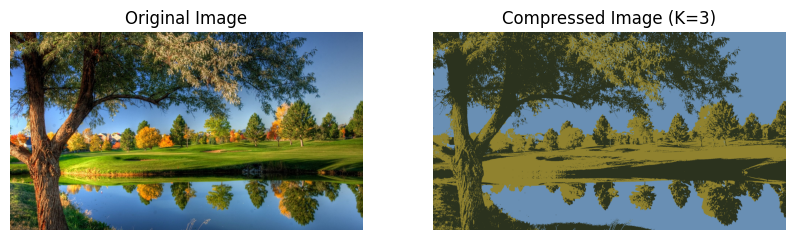

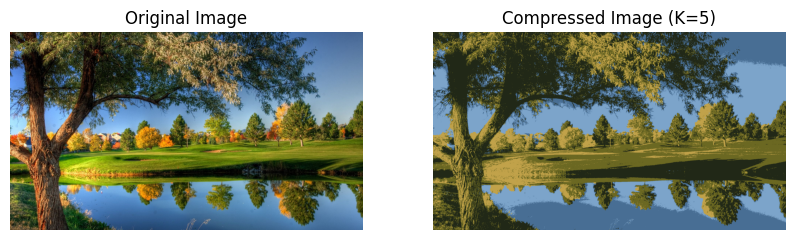

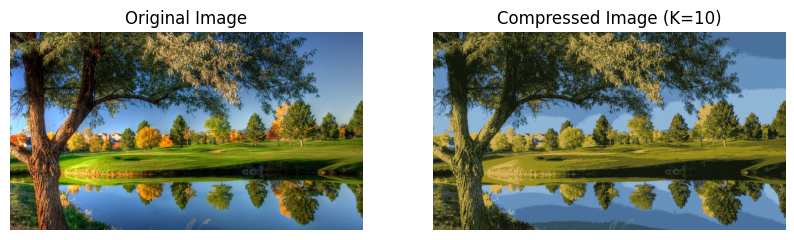

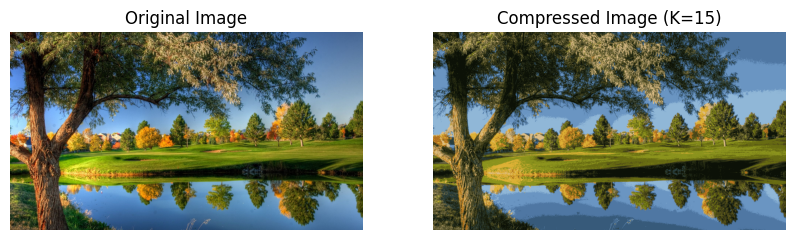

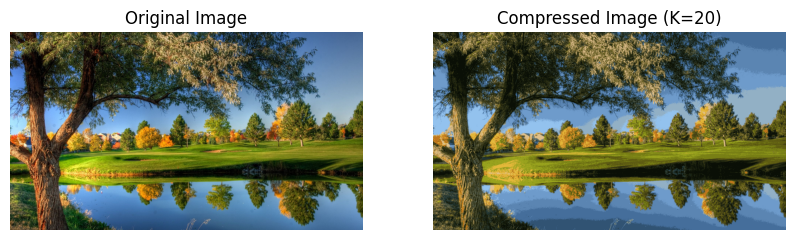

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

def k_means_image_compression(image_path, k):
    img = Image.open(image_path)
    img_array = np.array(img)
    img_flat = img_array.reshape((-1, 3))

    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(img_flat)

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    compressed_img_flat = cluster_centers[labels]
    compressed_img = compressed_img_flat.reshape(img_array.shape)
    compressed_img = Image.fromarray(np.uint8(compressed_img))

    return compressed_img

def display_images(original_img, compressed_img, k):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original_img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(compressed_img)
    axs[1].set_title(f'Compressed Image (K={k})')
    axs[1].axis('off')
    plt.show()
image_path = "/content/Nature-.jpg"
original_img = Image.open(image_path)

k_values = [2, 3, 5, 10, 15, 20]

for k in k_values:
    compressed_img = k_means_image_compression(image_path, k)
    display_images(original_img, compressed_img, k)


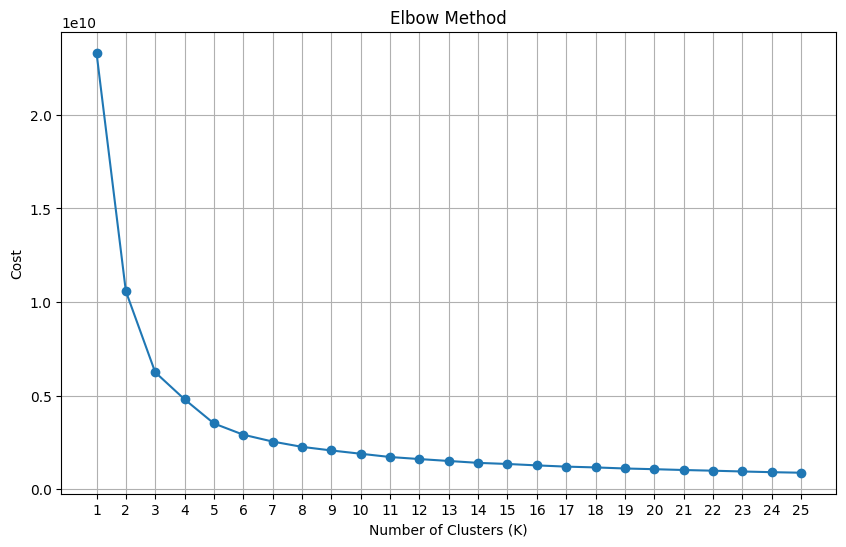

In [6]:
# Elbow method to find the optimal number of clusters (K)
def elbow_method(image_path, max_k):
    img = Image.open(image_path)
    img_array = np.array(img)
    img_flat = img_array.reshape((-1, 3))
    costs = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=3, random_state=42)
        kmeans.fit(img_flat)
        costs.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), costs, marker='o', linestyle='-')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Cost')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()

max_k = 25
elbow_method(image_path, max_k)
